# 1. Import Library

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
import plotly.graph_objects as go
from datetime import datetime

In [8]:
path="/Users/jameswang/Desktop/22S2/data5703/Data_OANDA/"

# 2. Detect Pattern

In [9]:
#load file
def load_file(file):
    df = pd.read_csv(path+file)
    df.columns=['datetime', 'open', 'high', 'low', 'close']
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.000000000Z')
    
    return df


## 2.1 Channel_up
reference:
<br>
https://www.investopedia.com/terms/a/ascendingchannel.asp
<br>
https://tlc.thinkorswim.com/center/reference/Patterns/Classic-Patterns/Channel-Up
<br>
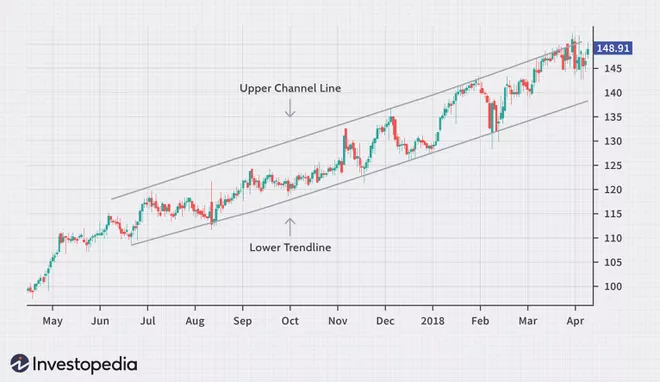


<br>
The Channel Up pattern is identified when there are two parallel lines, both moving up to the right across respective peaks (upper line) and bottoms (lower line). 

In [30]:
def detect_channel_up(df,w,s):
    
    
    local_min = np.array([])
    local_max = np.array([])
    max_idx = np.array([])
    min_idx = np.array([])
    
    #determine and store local min, local max and their index
    for i in range(0,len(df),w):
        local_max = np.append(local_max, df.low.iloc[i:i+w].max()) 
        max_idx = np.append(max_idx, df.low.iloc[i:i+w].idxmax())
        
        local_min = np.append(local_min, df.low.iloc[i:i+w].min()) 
        min_idx = np.append(min_idx, df.low.iloc[i:i+w].idxmin())

        
    channel_up = np.array([0]*len(df))
    
    count = 0
    n=0
    total_patterns=0
    index_list=[]
    
    
    for i in range(0,len(local_min),s):

        k_min, b_min = np.polyfit(min_idx[i:i+s], local_min[i:i+s],1)
        k_max, b_max = np.polyfit(max_idx[i:i+s], local_max[i:i+s],1)
    
        m = int(min_idx[count])
        
        #both lines need to be positive
        if k_min>0 and k_max>0:
            
            #check ratios of the slope 
            if k_min/k_max <1.1 and k_min/k_max>0.9:
                channel_up[n:m] = 1
                total_patterns+=1
                for j in range (n,m):
                    index_list.append(j)
        n=m
        count +=s
    
    df["channel_up"] = channel_up
    
    return df,total_patterns,index_list

In [42]:
df = load_file("GBP_JPY_M30_2005_202206.csv")
df,n,index_list = detect_channel_up(df,5,20)

In [35]:
df["channel_up"]

0         1
1         1
2         1
3         1
4         1
         ..
221401    0
221402    0
221403    0
221404    0
221405    0
Name: channel_up, Length: 221406, dtype: int64

## 2.2 Channel_down
reference:
<br>
https://www.investopedia.com/terms/a/ascendingchannel.asp
<br>
https://tlc.thinkorswim.com/center/reference/Patterns/Classic-Patterns/Channel-Down
<br>
The Channel Down pattern is identified when there are two parallel lines, both moving down to the right across respective peaks (upper line) and bottoms (lower line). 

In [64]:
def detect_channel_down(df,w,s):
    
    
    local_min = np.array([])
    local_max = np.array([])
    max_idx = np.array([])
    min_idx = np.array([])
    
    #determine and store local min, local max and their index
    for i in range(0,len(df),w):
        local_min = np.append(local_min, df.low.iloc[i:i+w].min()) 
        min_idx = np.append(min_idx, df.low.iloc[i:i+w].idxmin())


        local_max = np.append(local_max, df.low.iloc[i:i+w].max()) 
        max_idx = np.append(max_idx, df.low.iloc[i:i+w].idxmax())
        
    channel_down = np.array([0]*len(df))
    
    count = 0
    n=0
    total_patterns=0
    index_list=[]
    
    for i in range(0,len(local_max),s):
        
        k_max, b_max = np.polyfit(max_idx[i:i+s], local_max[i:i+s],1)
        k_min, b_min = np.polyfit(min_idx[i:i+s], local_min[i:i+s],1)
    
        m = int(max_idx[count])
        if k_min<0 and k_max<0:
        #both slopes have to be negative
            
            #check ratios of the slope 
            if k_min/k_max <1.1 and k_min/k_max>0.9:
                channel_down[n:m] = 1
                total_patterns+=1
                for j in range (n,m+1):
                    index_list.append(j)
        n=m
        count +=s
    
    df["channel_down"] = channel_down
    
    return df,total_patterns,index_list

In [43]:
import warnings
warnings.filterwarnings('ignore')
w = 5
s = 10
files = ["AUD_CAD_M5_2005_202206.csv",
        "AUD_JPY_M5_2005_202206.csv",
        "AUD_NZD_M5_2005_202206.csv",
        "AUD_USD_M5_2005_202206.csv",
        "CHF_JPY_M5_2005_202206.csv",
        "EUR_AUD_M5_2005_202206.csv",
        "EUR_CAD_M5_2005_202206.csv",
        "EUR_CHF_M5_2005_202206.csv"]
numer_of_patterns = []
for file in files:
    df = load_file(file)
    df,n,l = detect_channel_up(df,w,s)
    numer_of_patterns.append(n)
    print("total number of channel_up detected in " + file + ": " + str(n))

total number of channel_up_detected in AUD_CAD_M5_2005_202206.csv: 3465
total number of channel_up_detected in AUD_JPY_M5_2005_202206.csv: 3606
total number of channel_up_detected in AUD_NZD_M5_2005_202206.csv: 3335
total number of channel_up_detected in AUD_USD_M5_2005_202206.csv: 3492
total number of channel_up_detected in CHF_JPY_M5_2005_202206.csv: 3352
total number of channel_up_detected in EUR_AUD_M5_2005_202206.csv: 3401
total number of channel_up_detected in EUR_CAD_M5_2005_202206.csv: 3177
total number of channel_up_detected in EUR_CHF_M5_2005_202206.csv: 2827


In [44]:
import warnings
warnings.filterwarnings('ignore')
files = ["AUD_CAD_M5_2005_202206.csv",
         "AUD_CAD_M15_2005_202206.csv",
         "AUD_CAD_M30_2005_202206.csv"]
numer_of_patterns = []
for file in files:
    df = load_file(file)
    df,n,l = detect_channel_up(df,w,s)
    numer_of_patterns.append(n)
    print("total number of channel_up detected in " + file + ": " + str(n))

for file in files:
    df = load_file(file)
    df,n,l = detect_channel_down(df,w,s)
    numer_of_patterns.append(n)
    print("total number of channel_down detected in " + file + ": " + str(n))

total number of channel_up detected in AUD_CAD_M5_2005_202206.csv: 3465
total number of channel_up detected in AUD_CAD_M15_2005_202206.csv: 1193
total number of channel_up detected in AUD_CAD_M30_2005_202206.csv: 602
total number of channel_down detected in AUD_CAD_M5_2005_202206.csv: 5810
total number of channel_down detected in AUD_CAD_M15_2005_202206.csv: 1989
total number of channel_down detected in AUD_CAD_M30_2005_202206.csv: 1055


# 3. Visualize

In [61]:
df = load_file("GBP_JPY_M30_2005_202206.csv")
df,n,index_list = detect_channel_up(df,5,5)

In [62]:
index_list

[654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1334,
 1335,
 1336,
 1337,
 1338,
 1339,
 1340,
 1341,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347,
 1348,
 1349,
 1350,
 1351,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1453,
 1454,
 1455,
 1456,
 1457,
 1458,
 1459,
 1460,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 2154,
 2155,
 2156,
 2157,
 2158,
 2159,
 2160,
 2161,
 2162,
 2163,
 2164,
 2165,
 2166,
 2167,
 2168,
 2169,
 2170,
 2171,
 2172,
 2173,
 2174,
 2175,
 2176,

In [49]:
local_min = np.array([])
local_max = np.array([])
max_idx = np.array([])
min_idx = np.array([])

for i in range(0,len(df),5):
    local_min = np.append(local_min, df.low.iloc[i:i+w].min()) 
    min_idx = np.append(min_idx, df.low.iloc[i:i+w].idxmin())


    local_max = np.append(local_max, df.low.iloc[i:i+w].max()) 
    max_idx = np.append(max_idx, df.low.iloc[i:i+w].idxmax())



In [67]:
dfpl = df[600:700]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
#fit intercepts

max_d = (df.high.iloc[max_idx[120:140]] - k_max*max_idx[120:140]).max()
min_d = (df.low.iloc[min_idx[120:140]] - k_min*min_idx[120:140]).min()

fig.add_trace(go.Scatter(x=min_idx[120:140], y=k_min*min_idx[120:140] + min_d, mode='lines', name='lower line'))
fig.add_trace(go.Scatter(x=max_idx[120:140], y=k_max*max_idx[120:140] + max_d, mode='lines', name='upper line'))


fig.show()


dfpl = df[1240:1400]
k_min, b_min = np.polyfit(min_idx[248:280], local_min[248:280],1)
k_max, b_max = np.polyfit(max_idx[248:280], local_max[248:280],1)


fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
#fit intercepts
max_d = (df.high.iloc[max_idx[248:280]] - k_max*max_idx[248:280]).max()
min_d = (df.low.iloc[min_idx[248:280]] - k_min*min_idx[248:280]).min()
fig.add_trace(go.Scatter(x=min_idx[248:280], y=k_min*min_idx[248:280] + min_d, mode='lines', name='lower line'))
fig.add_trace(go.Scatter(x=max_idx[248:280], y=k_max*max_idx[248:280] + max_d, mode='lines', name='upper line'))
fig.show()

k_min, b_min = np.polyfit(min_idx[365:380], local_min[365:380],1)
k_max, b_max = np.polyfit(max_idx[365:380], local_max[365:380],1)

dfpl = df[1820:1900]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])
#fit intercepts
max_d = (df.high.iloc[max_idx[365:380]] - k_max*max_idx[365:380]).max()
min_d = (df.low.iloc[min_idx[365:380]] - k_min*min_idx[365:380]).min()
fig.add_trace(go.Scatter(x=min_idx[365:380], y=k_min*min_idx[365:380] + min_d, mode='lines', name='lower line'))
fig.add_trace(go.Scatter(x=max_idx[365:380], y=k_max*max_idx[365:380] + max_d, mode='lines', name='upper line'))
fig.show()